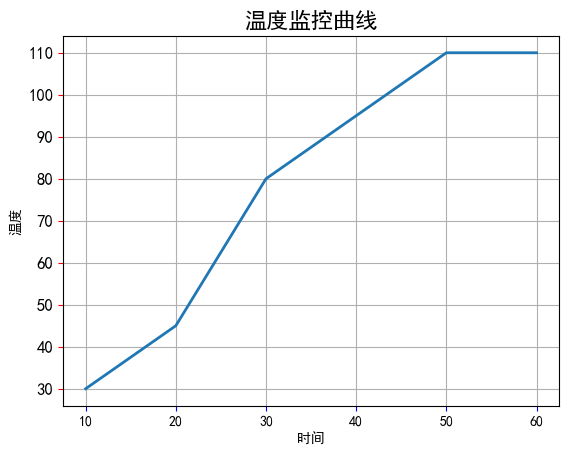

In [2]:
#! /usr/bin/env python3
# _*_ coding:utf8 _*_

import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm

xdata = [10, 20, 30, 40, 50, 60]
ydata = [30, 45, 80, 95, 110, 110]

plt.rcParams["font.sans-serif"] = ['simhei'] #设置字体解决中文乱码
#fm.FontProperties(fname=r'/data/data/com.termux/files/home/.termux/font.ttf')
#plt.rc("font", family=u"simhei", size=8) #设置字体属性
plt.rcParams["axes.unicode_minus"] = False   #解决图像中的“-”负号的乱码问题


plt.title("温度监控曲线", fontsize=16)
plt.xlabel("时间")
plt.ylabel("温度")
plt.plot(xdata,ydata,linewidth=2)
plt.grid(which='major', axis='both')
plt.tick_params(axis="y", labelsize=12, color="red")
plt.tick_params(axis="x", labelsize=10, color="blue") #设置坐标轴属性
plt.show()

In [18]:
import matplotlib
matplotlib.get_configdir()

'/data/data/com.termux/files/home/.config/matplotlib'

In [ ]:
import matplotlib.pyplot as plt

title = str(input("请图表名称:"))
xdata = str(input("请输入x坐标数据，并以\',\'分隔：")).split(",")
xlabel = str(input("请x轴名称:"))
ydata = str(input("请输入y坐标数据，并以\',\'分隔：")).split(",")
ylabel = str(input("请y轴名称:"))


plt.rcParams["font.sans-serif"] = ['simhei'] #设置字体解决中文乱码
plt.rcParams["axes.unicode_minus"] = False   #解决图像中的“-”负号的乱码问题

plt.title(title, fontsize=16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.plot(xdata,ydata,linewidth=2)
plt.tick_params(axis="y", labelsize=12, color="red")
plt.tick_params(axis="x", labelsize=10, color="blue") #设置坐标轴属性
plt.show()

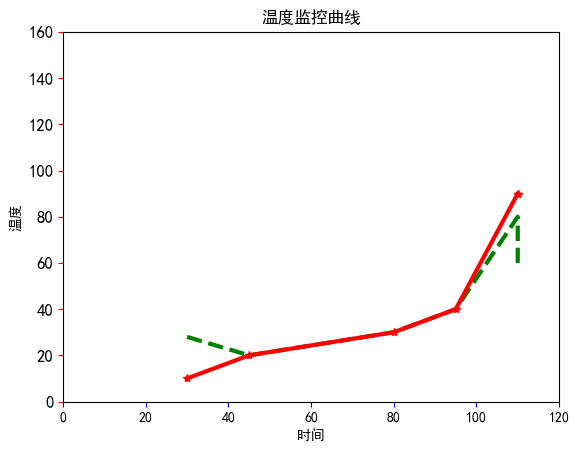

In [66]:
from redis import *
import matplotlib.pyplot as plt

HOSTIP="192.168.1.128"

rdb = StrictRedis(host=HOSTIP,db=1)
if str(rdb.get("online"),encoding='utf-8') == "ok":
    rdb.close()
    ydata1 = [28, 20, 30, 40, 80, 60]
    xdata1 = [30, 45, 80, 95, 110, 110]
    ydata2 = [10, 20, 30, 40, 90, 90]
    xdata2 = [30, 45, 80, 95, 110, 110]
        
    plt.rcParams["font.sans-serif"] = ['simhei'] #设置字体解决中文乱码
    plt.rcParams["axes.unicode_minus"] = False   #解决图像中的“-”负号的乱码问题
    plt.title("温度监控曲线")
    plt.xlabel("时间")
    plt.ylabel("温度")
    #plt.xticks(xdata1)#设定X轴刻度
    plt.axis([0,120,0,160])#限定刻度最大尺寸
    plt.plot(xdata1,ydata1,"g--",xdata2,ydata2,"r-*",linewidth=3)
    plt.tick_params(axis="y", labelsize=12, color="red")
    plt.tick_params(axis="x", labelsize=10, color="blue") #设置坐标轴属性
    plt.show()
else:
    print("no")

OK
0
请输入检测时长(秒)120
请输入采样时间周期（秒）5


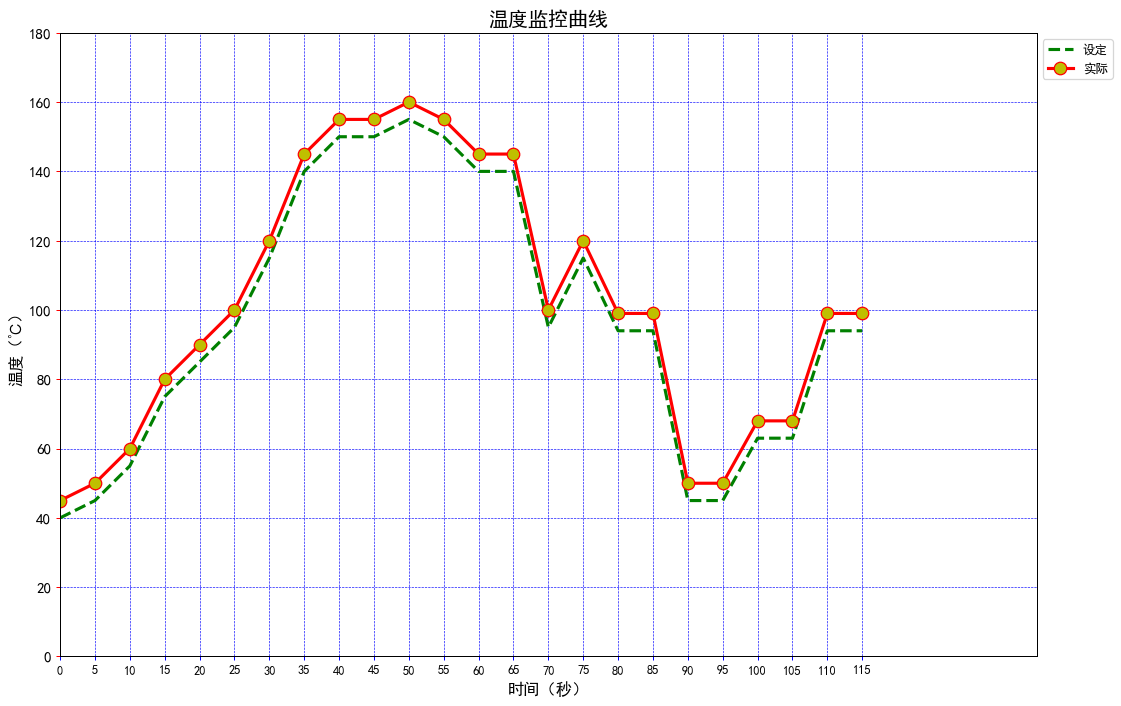

Temp b'55'
Temp b'55'


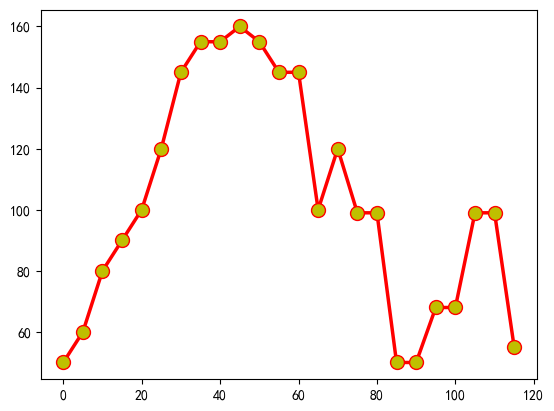

Temp b'120'
Temp b'120'


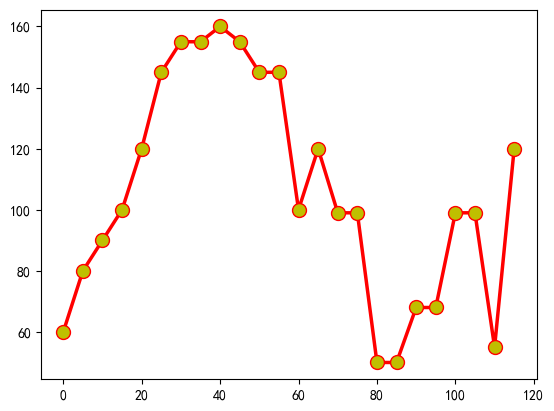

Temp b'135'
Temp b'135'


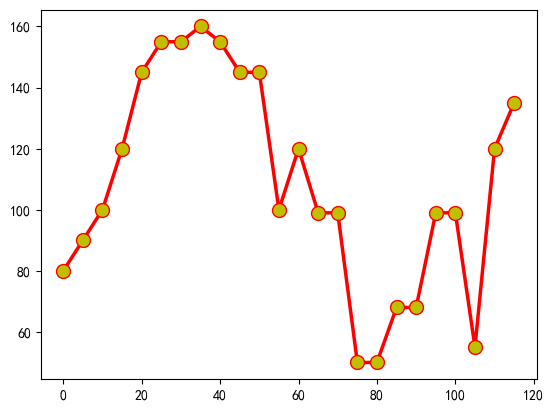

In [ ]:
from redis import *
from paho.mqtt import client
import matplotlib.pyplot as plt
from tkinter import messagebox
import threading
import time as msleep
import uuid
import sys

HOSTIP="192.168.1.128"
cUser = "Admin"
cPwd = "66666666"
cID = str(uuid.uuid4())

try:    
    Redis(host=HOSTIP,db=1).ping()
except ConnectionError:
    messagebox.showerror("错误", "服务器未启动")
    sys.exit()
except Exception as e:
    print(e)
    
def sd_connect(client, userdata, flags, rc):
    print(str(rc))
    client.subscribe("Temp")

def sd_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))
    rdb.select(1)
    rdb.rpush("Temp",int(msg.payload))
    main()
    
    
def server():    
    mqtt = client.Client(cID)
    mqtt.username_pw_set(cUser, cPwd)
    mqtt.on_connect = sd_connect
    mqtt.on_message = sd_message
    mqtt.connect(HOSTIP, 1883)
    print("OK")
    mqtt.loop_forever()


def main():
    rdb = StrictRedis(host=HOSTIP,db=1)
    ydata2 = [int(y) for y in rdb.lrange("Temp",-int(len(xdata)),-1)]#获取实测数据
    meaTemp,= plt.plot(xdata,ydata2,"r-",linewidth=2.5,marker = 'o', ms = 10,mfc = 'y',label="实际")
    plt.show()
    
rdb = StrictRedis(host=HOSTIP,db=1)
mqttserver = threading.Thread(target=server)
mqttserver.start()

if str(rdb.get("online"),encoding='utf-8') == "ok":
    global xdata,meaTemp
    time = int(input("请输入检测时长(秒)"))
    step = int(input("请输入采样时间周期（秒）"))
    xdata = [x for x in range(0,time,step)]   #时间列表生成 
    ydata2 = [int(y) for y in rdb.lrange("Temp",-int(len(xdata)),-1)]#获取实测数据

    ydata1=[x-5 for x in ydata2]#设定数据
    
    if rdb.llen("Temp") >= 100:
        #数据库存储数据限定100条
        rdb.ltrim("Temp",-100,-1)
        
            
    rdb.close()
    
    plt.figure(dpi=90, figsize=(14, 9))
        
    plt.rcParams["font.sans-serif"] = ['simhei'] #设置字体解决中文乱码
    plt.rcParams["axes.unicode_minus"] = False   #解决图像中的“-”负号的乱码问题
    
    plt.title("温度监控曲线",fontsize=16)
    plt.xlabel("时间（秒）", fontsize=13)
    plt.ylabel("温度（℃）",fontsize=13 )

    plt.xticks(xdata)#设定X轴刻度
    plt.axis([0,time+20,0,max(ydata2)+20])#限定刻度最大尺寸

    setTemp,= plt.plot(xdata,ydata1,"g--",linewidth=2.5,label="设定")
    meaTemp,= plt.plot(xdata,ydata2,"r-",linewidth=2.5,marker = 'o', ms = 10,mfc = 'y',label="实际")
    plt.legend(handles=[setTemp, meaTemp],loc="upper left", bbox_to_anchor=(1,1))
    plt.grid(color = 'b', linestyle = '--', linewidth = 0.5)
    #plt.grid(which='major', axis='both')#设置网格线
    plt.tick_params(axis="y", labelsize=12, color="red")
    plt.tick_params(axis="x", labelsize=10, color="blue") #设置坐标轴属性
    #plt.savefig("reslut.png",bbox_inches="tight")
    plt.show()
    msleep.sleep(2000)
    print("over")
else:
    messagebox.showerror("错误", "授权失败")

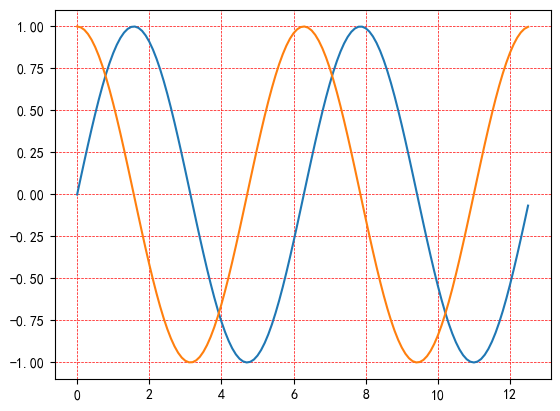

In [12]:























































import matplotlib.pyplot as plt
import numpy as np
#https://www.runoob.com/matplotlib/matplotlib-tutorial.html
x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)
plt.grid(color = 'r', linestyle = '--', linewidth = 0.5)
plt.show()

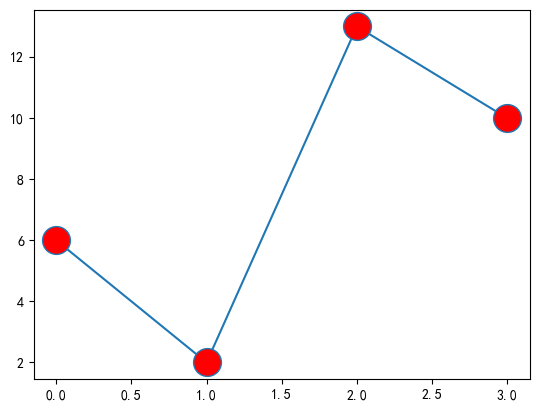

In [11]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([6, 2, 13, 10])

#plt.plot(ypoints, marker = 'o', ms = 20)
#plt.plot(ypoints, marker = 'o', ms = 20, mec = 'r')
plt.plot(ypoints, marker = 'o', ms = 20, mfc = 'r')
plt.show()

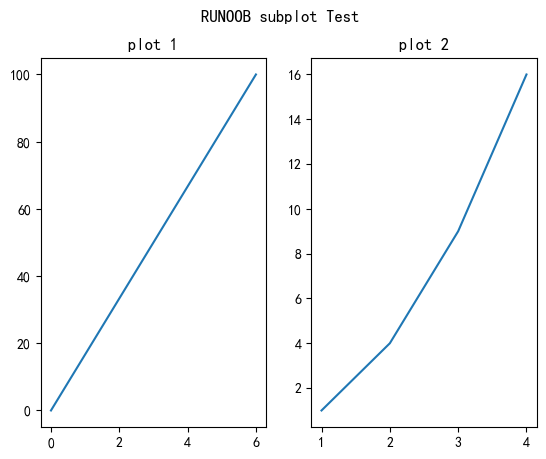

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
xpoints = np.array([0, 6])
ypoints = np.array([0, 100])

plt.subplot(1, 2, 1)
plt.plot(xpoints,ypoints)
plt.title("plot 1")

#plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(1, 2, 2)
plt.plot(x,y)
plt.title("plot 2")

plt.suptitle("RUNOOB subplot Test")
plt.show()

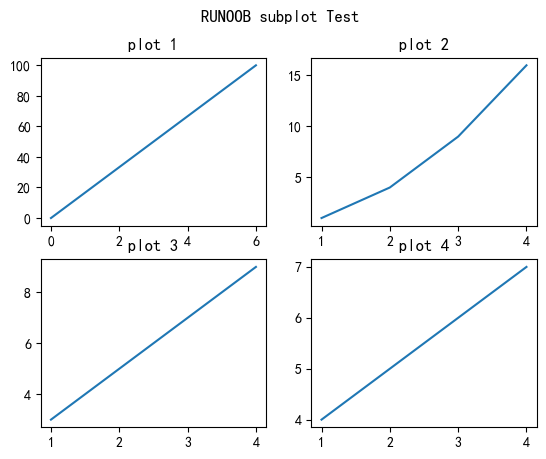

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 6])
y = np.array([0, 100])

plt.subplot(2, 2, 1)
plt.plot(x,y)
plt.title("plot 1")

#plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(2, 2, 2)
plt.plot(x,y)
plt.title("plot 2")

#plot 3:
x = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])

plt.subplot(2, 2, 3)
plt.plot(x,y)
plt.title("plot 3")

#plot 4:
x = np.array([1, 2, 3, 4])
y = np.array([4, 5, 6, 7])

plt.subplot(2, 2, 4)
plt.plot(x,y)
plt.title("plot 4")

plt.suptitle("RUNOOB subplot Test")
plt.show()

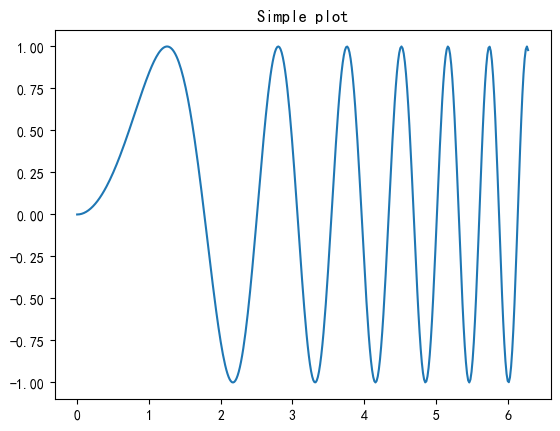

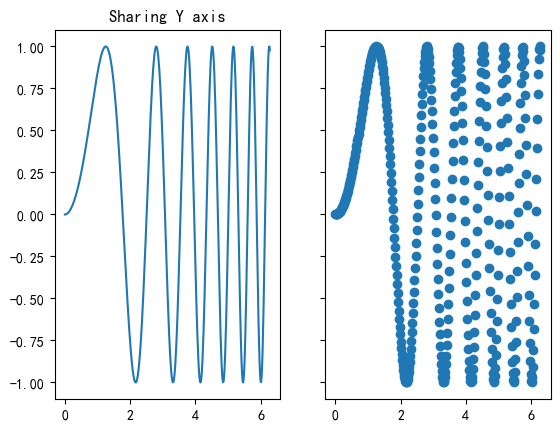

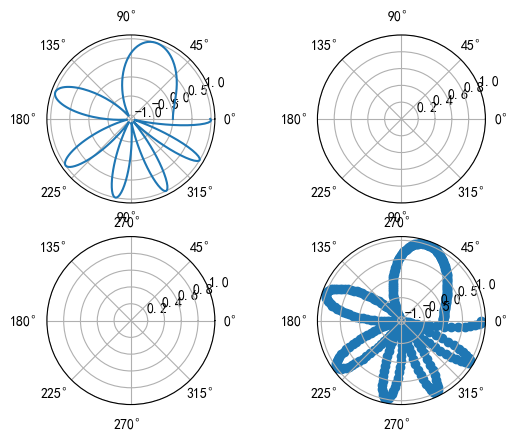

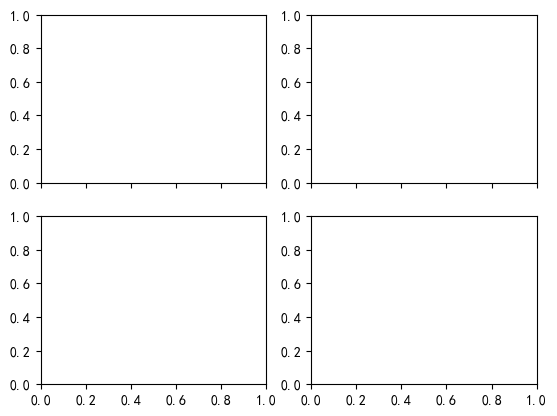

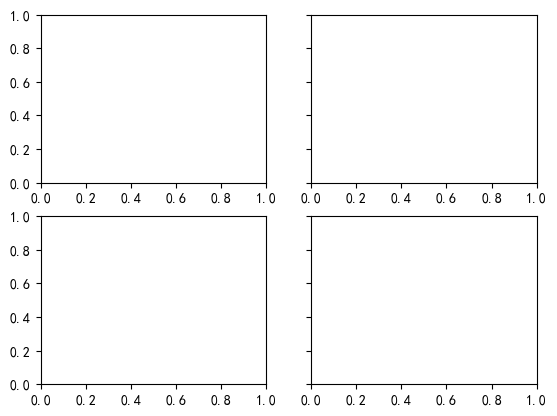

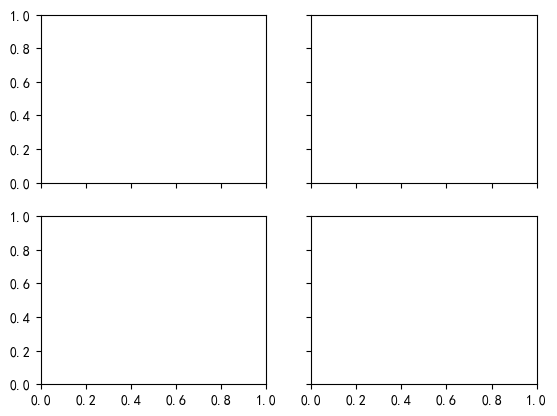

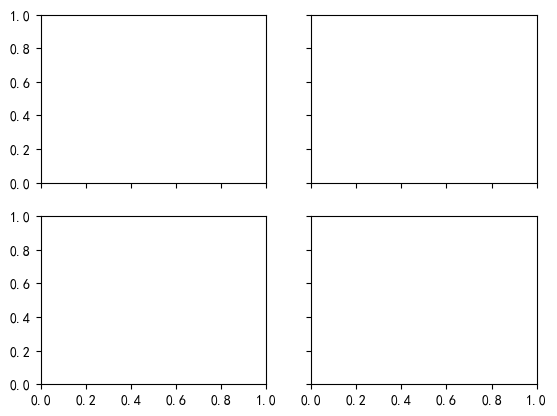

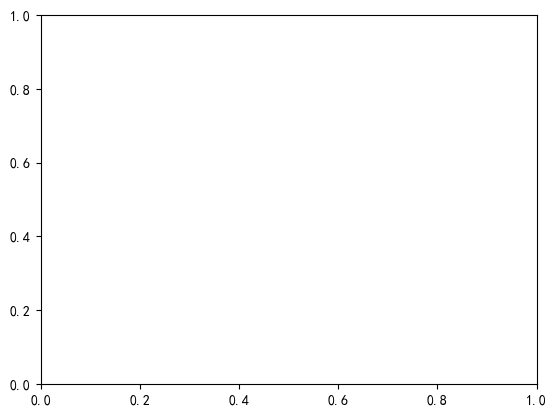

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一些测试数据 -- 图1
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# 创建一个画像和子图 -- 图2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# 创建两个子图 -- 图3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# 创建四个子图 -- 图4
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# 共享 x 轴
plt.subplots(2, 2, sharex='col')

# 共享 y 轴
plt.subplots(2, 2, sharey='row')

# 共享 x 轴和 y 轴
plt.subplots(2, 2, sharex='all', sharey='all')

# 这个也是共享 x 轴和 y 轴
plt.subplots(2, 2, sharex=True, sharey=True)

# 创建标识为 10 的图，已经存在的则删除
fig, ax = plt.subplots(num=10, clear=True)

plt.show()

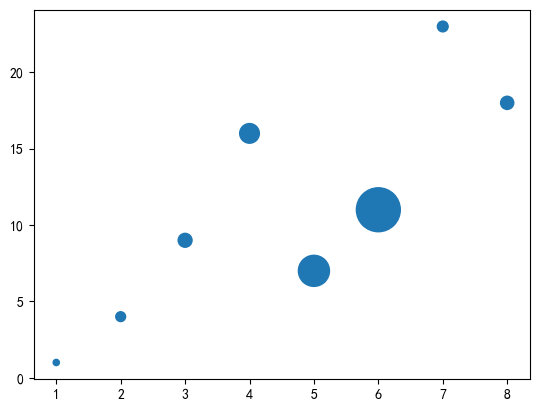

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 4, 9, 16, 7, 11, 23, 18])
sizes = np.array([20,50,100,200,500,1000,60,90])
plt.scatter(x, y, s=sizes)
plt.show()

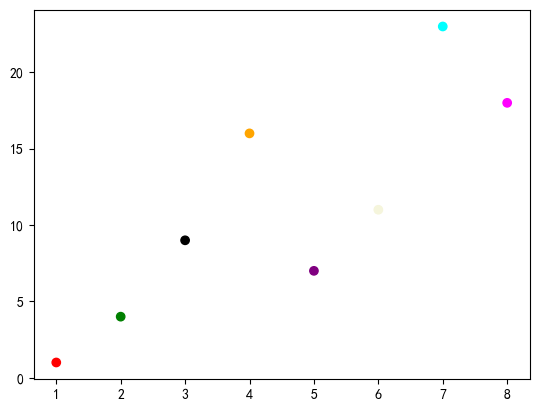

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 4, 9, 16, 7, 11, 23, 18])
colors = np.array(["red","green","black","orange","purple","beige","cyan","magenta"])

plt.scatter(x, y, c=colors)
plt.show()

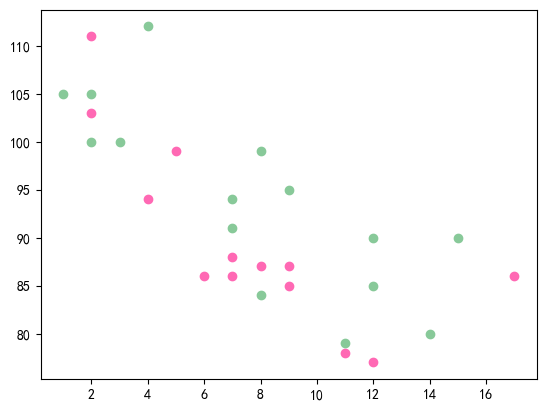

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.show()

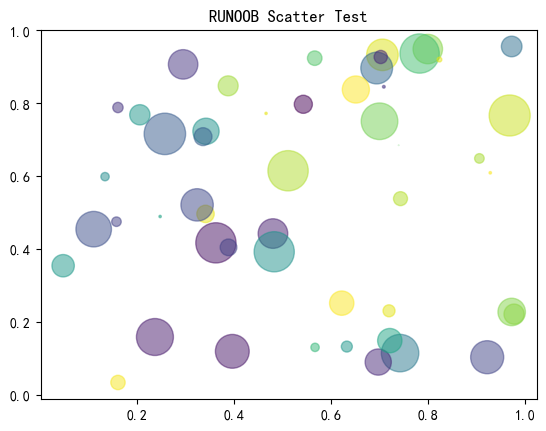

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 随机数生成器的种子
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5) # 设置颜色及透明度

plt.title("RUNOOB Scatter Test") # 设置标题

plt.show()

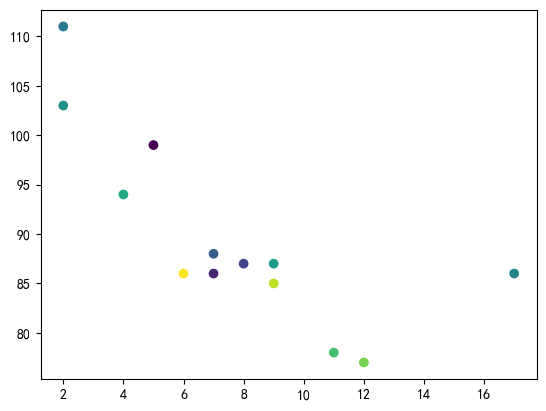

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, c=colors, cmap='viridis')

plt.show()

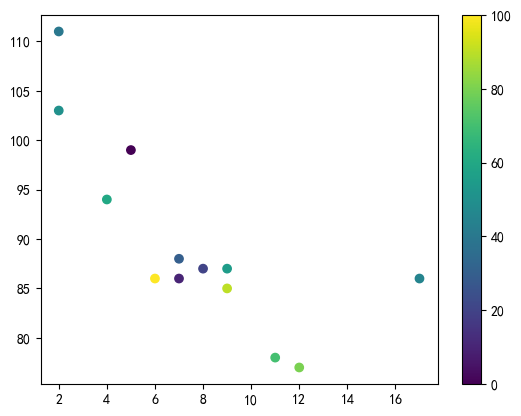

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, c=colors, cmap='viridis')

plt.colorbar()

plt.show()

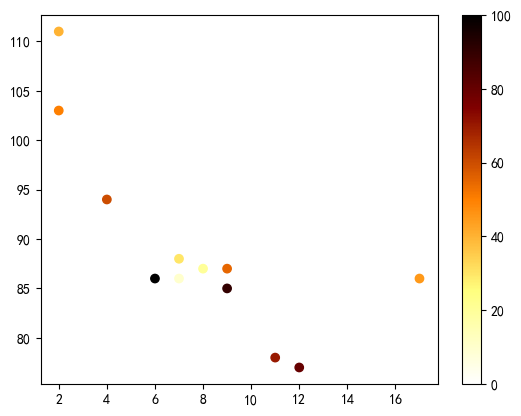

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])

plt.scatter(x, y, c=colors, cmap='afmhot_r')
plt.colorbar()
plt.show()